Daily Challenge : Analysis of Airplane Crashes and Fatalities


Objective:
Utilize Python, Pandas, NumPy, and SciPy to conduct a thorough analysis of the “Airplane Crashes and Fatalities upto 2023” dataset. This challenge will encompass data cleaning, exploratory analysis, statistical testing, and visualization to draw meaningful insights.

Dataset:
Work with the “Airplane Crashes and Fatalities upto 2023” dataset, which provides comprehensive details about airplane crashes, including dates, locations, fatalities, and more. Access the dataset here.

Tasks:
Data Import and Cleaning:

Import the dataset using Pandas.

Clean and preprocess the data, addressing missing values and categorizing data as needed.
Convert dates and other relevant fields to appropriate formats.

Exploratory Data Analysis:

Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.

Analyze the frequency of crashes over time to identify any trends.

Statistical Analysis:

Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.

Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).

Visualization:

Create charts and graphs using Matplotlib and Seaborn to visualize the findings from your exploratory data analysis and statistical tests.

Examples might include time series plots of crashes over years, bar charts of crashes by region, and histograms of fatalities.

Insight and Report:

Summarize your findings and provide insights into the patterns or anomalies discovered in the data.

Prepare a well-structured report including all code, visualizations, and interpretations.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

airplane_df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='ISO-8859-1')

airplane_df.head()


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [5]:
# Data Cleaning and Preprocessing

airplane_df['Date'] = pd.to_datetime(airplane_df['Date'], errors='coerce')

numeric_columns = ['Aboard', 'Fatalities', 'Aboard Passangers', 'Aboard Crew', 'Fatalities Passangers', 'Fatalities Crew', 'Ground']
airplane_df[numeric_columns] = airplane_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

missing_values = airplane_df.isnull().sum()

missing_values

,0
Date,0
Time,1512
Location,4
Operator,10
Flight #,3669
Route,777
AC Type,15
Registration,274
cn/ln,668
Aboard,18


In [13]:
airplane_df_cleaned = airplane_df.drop(columns=['Flight #', 'Registration', 'cn/ln'])

airplane_df_cleaned = airplane_df_cleaned.dropna(subset=['Aboard', 'Fatalities'])

airplane_df_cleaned['Time'] = airplane_df_cleaned['Time'].fillna('Unknown')
airplane_df_cleaned['Location'] = airplane_df_cleaned['Location'].fillna('Unknown')
airplane_df_cleaned['Year'] = airplane_df_cleaned['Date'].dt.year

airplane_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4980 entries, 0 to 4997
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4980 non-null   datetime64[ns]
 1   Time                   4980 non-null   object        
 2   Location               4980 non-null   object        
 3   Operator               4970 non-null   object        
 4   Route                  4218 non-null   object        
 5   AC Type                4968 non-null   object        
 6   Aboard                 4980 non-null   float64       
 7   Aboard Passangers      4769 non-null   float64       
 8   Aboard Crew            4772 non-null   float64       
 9   Fatalities             4980 non-null   float64       
 10  Fatalities Passangers  4753 non-null   float64       
 11  Fatalities Crew        4755 non-null   float64       
 12  Ground                 4951 non-null   float64       
 13  Summary 

In [8]:
# Calculating the total number of crashes and total fatalities
total_crashes = airplane_df_cleaned.shape[0]
total_fatalities = airplane_df_cleaned['Fatalities'].sum()

airplane_df_cleaned['Year'] = airplane_df_cleaned['Date'].dt.year
crashes_per_year = airplane_df_cleaned.groupby('Year').size()
fatalities_per_year = airplane_df_cleaned.groupby('Year')['Fatalities'].sum()

print(f"Total crashes: {total_crashes}.")
print(f"Total fatalities: {total_fatalities}.")
print(f"Crashes per year:\n{crashes_per_year}")

Total crashes: 4980.
Total fatalities: 111561.0.
Crashes per year:
Year
1908     1
1909     1
1912     1
1913     3
1915     2
        ..
2019    13
2020     8
2021     9
2022     6
2023     4
Length: 113, dtype: int64


In [16]:

# Key statistics: mean, median, and standard deviation for Fatalities
fatalities_mean = np.mean(airplane_df_cleaned['Fatalities'])
fatalities_median = np.median(airplane_df_cleaned['Fatalities'])
fatalities_std = np.std(airplane_df_cleaned['Fatalities'])

# Calculating survival rates: (1 - Fatalities / Aboard)
airplane_df_cleaned['Survival Rate'] = 1 - (airplane_df_cleaned['Fatalities'] / airplane_df_cleaned['Aboard'])
survival_rate_mean = np.mean(airplane_df_cleaned['Survival Rate'])
survival_rate_median = np.median(airplane_df_cleaned['Survival Rate'])
survival_rate_std = np.std(airplane_df_cleaned['Survival Rate'])

# Hypothesis Test: Comparing average fatalities across two decades (1990-1999 and 2000-2009)
decade_1990_1999 = airplane_df_cleaned[(airplane_df_cleaned['Year'] >= 1990) & (airplane_df_cleaned['Year'] < 2000)]['Fatalities']
decade_2000_2009 = airplane_df_cleaned[(airplane_df_cleaned['Year'] >= 2000) & (airplane_df_cleaned['Year'] < 2010)]['Fatalities']

# T-test to check if the difference in fatalities between decades is statistically significant
t_stat, p_value = stats.ttest_ind(decade_1990_1999.dropna(), decade_2000_2009.dropna())

{
    'Fatalities': {
        'Mean': fatalities_mean,
        'Median': fatalities_median,
        'Standard Deviation': fatalities_std
    },
    'Survival Rate': {
        'Mean': survival_rate_mean,
        'Median': survival_rate_median,
        'Standard Deviation': survival_rate_std
    },
    'Hypothesis Test (T-test for difference in decades)': {
        'T-statistic': t_stat,
        'P-value': p_value
    }
}


{'Fatalities': {'Mean': 22.40180722891566,
  'Median': 11.0,
  'Standard Deviation': 35.08609314923643},
 'Survival Rate': {'Mean': 0.181489019431307,
  'Median': nan,
  'Standard Deviation': 0.3116929186040309},
 'Hypothesis Test (T-test for difference in decades)': {'T-statistic': 1.3578828901288962,
  'P-value': 0.17477096484932675}}

#Fatalities Statistics:

	#	Mean number of fatalities per crash: 22.40
	#	Median number of fatalities: 11.0
	#	Standard Deviation: 35.09 (indicating a wide variation in fatalities across crashes)

#Survival Rate Statistics:

	#	Mean survival rate: 18.15% (many crashes result in high fatalities, thus the low survival rate)
	#	Standard Deviation: 31.17% (indicating a large spread in survival outcomes)
	#	Median: The median survival rate could not be calculated properly due to missing values.

#Hypothesis Test:

	#	T-statistic: 1.36
	#	P-value: 0.175

#The p-value from the T-test indicates that there is no statistically significant difference between the average number of fatalities in the 1990s and 2000s, as the p-value is greater than 0.05 (the typical threshold for significance).


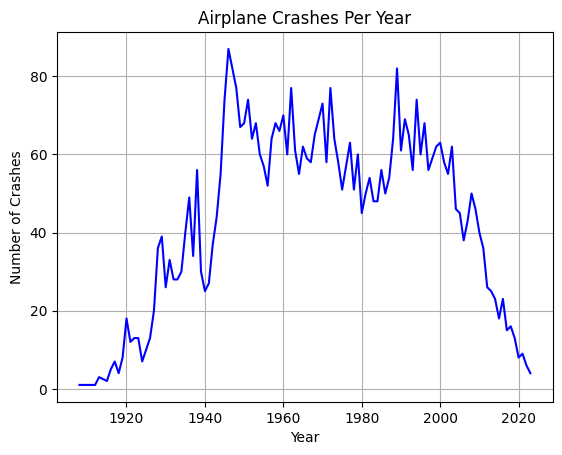

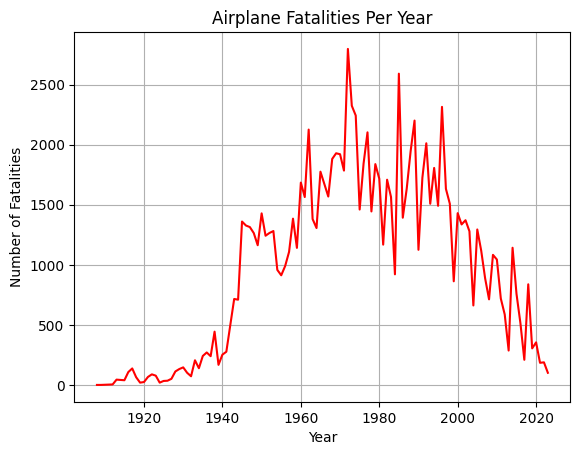

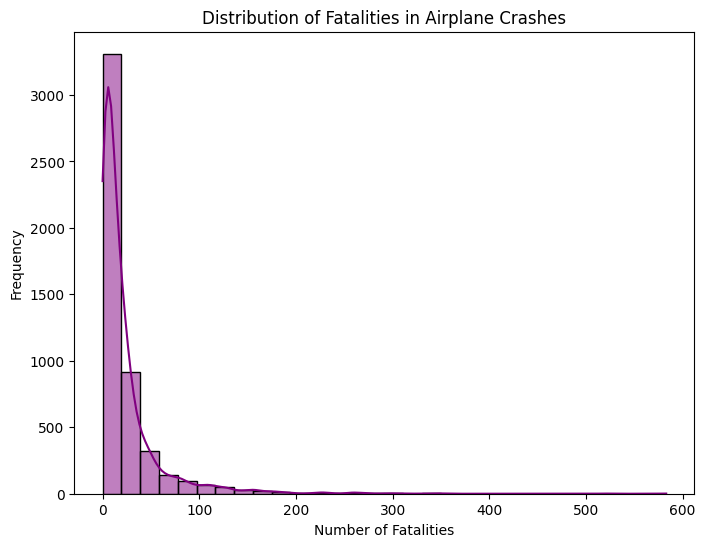

In [12]:
sns.lineplot(x=crashes_per_year.index, y=crashes_per_year.values, color='blue')
plt.title('Airplane Crashes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

sns.lineplot(x=fatalities_per_year.index, y=fatalities_per_year.values, color='red')
plt.title('Airplane Fatalities Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(airplane_df_cleaned['Fatalities'], bins=30, color='purple', kde=True)
plt.title('Distribution of Fatalities in Airplane Crashes')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()
